Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


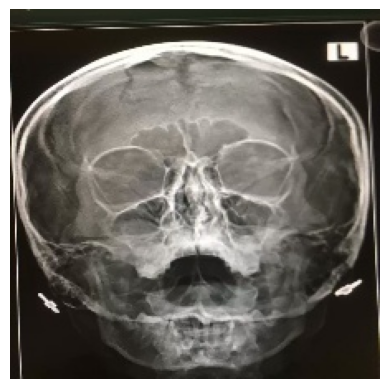

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [[0.73248225]]
Test Result: Valid: Water's View


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

IMG_HEIGHT, IMG_WIDTH = 224, 224

# Load the trained model
model = load_model('/content/drive/MyDrive/sinusities/improved_waters_view_validator_model.h5', compile=False)

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    if img is None:
        raise ValueError(f"Could not read image from {image_path}")
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    return img

# Function to classify the image
def classify_image(image_path):
    try:
        img = preprocess_image(image_path)
        prediction = model.predict(img)

        print(f"Prediction: {prediction}")

        probability = prediction[0][0]  # Get the prediction score

        if probability > 0.5:
            return "Valid: Water's View"
        else:
            return "Invalid Image"
    except Exception as e:
        return f"Error: {e}"

# Test the model
test_image_path = "/content/drive/MyDrive/sinusities/test_waters_view/moderate_sinus_91.jpg"

image = Image.open(test_image_path).convert("RGB")

# Show the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

result = classify_image(test_image_path)
print(f"Test Result: {result}")
